In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**EDA on the dataset**

In [8]:
df = pd.read_csv('SuperMarket Analysis.csv')
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


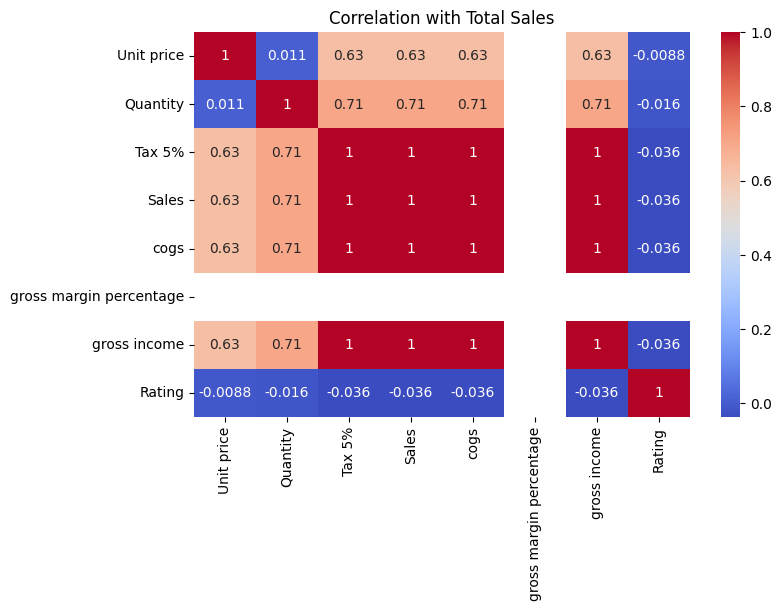

In [ ]:
df.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation with Sales")
plt.show()


**Analysis from Heatmap**

Above, we can see there's a strong correlation between sales and unit price, quantity, tax, cogs, gross income and a moderately positive correlation with rating.


In [12]:
df.groupby("Product line")["Sales"].sum().sort_values(ascending=False)


Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64

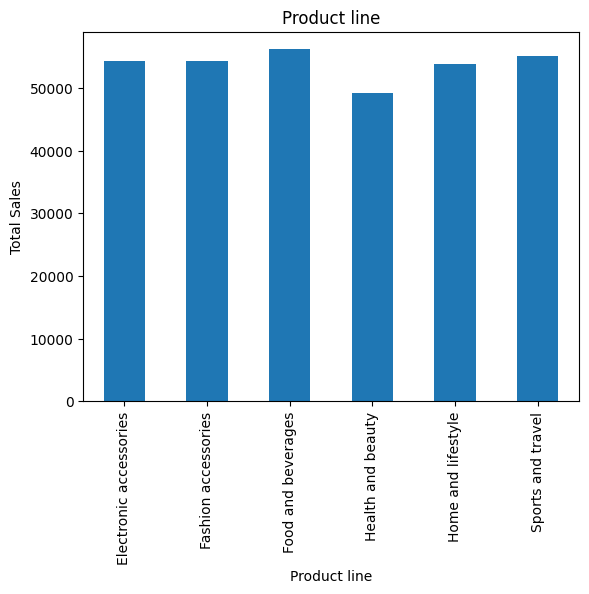

In [13]:
df.groupby("Product line")["Sales"].sum().plot(kind="bar")
plt.ylabel("Total Sales")
plt.title("Product line")
plt.show()


0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Month, Length: 1000, dtype: int32


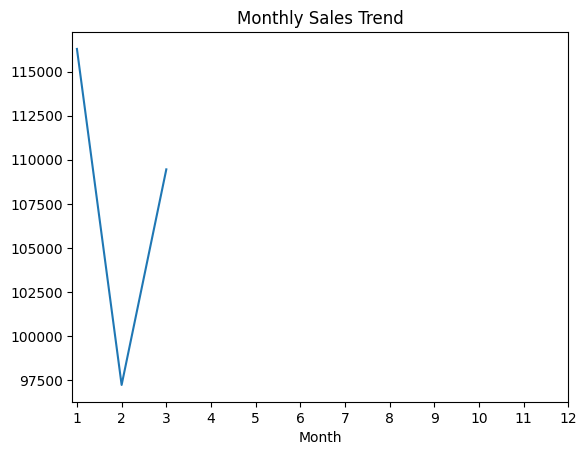

In [17]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
print(df["Month"])
df.groupby("Month")["Sales"].sum().plot()
plt.xticks(range(1, 13))  
plt.xlabel("Month")
plt.title("Monthly Sales Trend")
plt.show()


The peak sales month is in January, the first month

C:\Users\onyii\AppData\Local\Temp\ipykernel_6928\2103776206.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time_dt"] = pd.to_datetime(df["Time"])


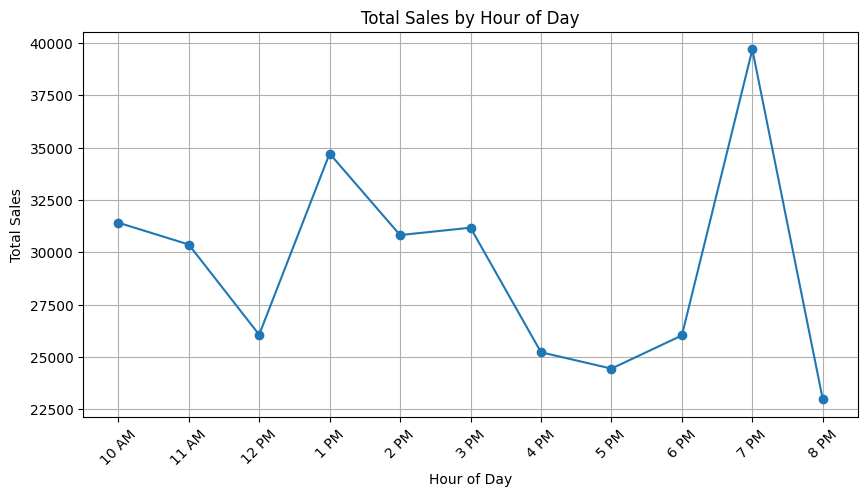

In [ ]:

df["Time_dt"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time_dt"].dt.hour
hourly_sales = df.groupby("Hour")["Sales"].sum()

# Create 12-hour AM/PM labels
labels = [f"{h%12 if h%12!=0 else 12} {'AM' if h<12 else 'PM'}" for h in hourly_sales.index]

# Plot
plt.figure(figsize=(10,5))
plt.plot(hourly_sales.index, hourly_sales.values, marker="o")
plt.xticks(ticks=hourly_sales.index, labels=labels, rotation=45) 
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.title("Total Sales by Hour of Day")
plt.grid(True)
plt.show()



From above we can see the peak hour for sale is 7:00pm and the least time was around 8pm

**Building the machine learning Predictive Model**

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [180]:
# Split data into features (X) and target (y)
X = df[["Unit price", "Quantity"]]
categorical_cols = pd.get_dummies(df[["Gender", "Product line", "Month", "Hour"]], drop_first=True)
X = pd.concat([X, categorical_cols], axis=1)
y = df["Sales"]

In [181]:
X

,Unit price,Quantity,Month,Hour,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,74.69,7,1,13,False,False,False,True,False,False
1,15.28,5,3,10,False,False,False,False,False,False
2,46.33,7,3,13,False,False,False,False,True,False
3,58.22,8,1,20,False,False,False,True,False,False
4,86.31,7,2,10,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,1,13,True,False,False,True,False,False
996,97.38,10,3,17,False,False,False,False,True,False
997,31.84,1,2,13,True,False,True,False,False,False
998,65.82,1,2,15,True,False,False,False,True,False


In [182]:
y

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Sales, Length: 1000, dtype: float64

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 10) (200, 10) (800,) (200,)


In [184]:
y_train

29      235.2105
535     122.5245
695     458.6925
557    1034.4600
836     202.3350
         ...    
106     172.4940
270     354.0075
860      90.5835
435     937.8180
102     218.0115
Name: Sales, Length: 800, dtype: float64

In [185]:
y_test

521    523.9710
737    616.9800
740    408.7335
660    135.3555
411     45.9270
         ...   
408    237.4260
332    404.3550
208     95.6655
613     84.9765
78     822.2550
Name: Sales, Length: 200, dtype: float64

In [186]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [169]:
linear_predictions = linear_model.predict(X_test)
linear_predictions

array([ 521.27696278,  593.44085197,  410.74886936,  102.96288239,
        -87.93477783,  591.35111257,  141.10832642,  658.55778169,
        485.73251113,  120.23450676,  493.45894766,  489.44876626,
        241.28335135,  318.36087522,  384.44574852,  402.51890504,
        557.50588251,  237.75773878,  670.68968282,  155.49294677,
        413.18151772,  257.7625409 ,  149.93069028,  137.35702269,
        344.0197818 ,  332.55688606,  662.97898639, -121.96560959,
        126.16271543,   42.42154939,  148.7498921 ,  562.68202838,
        275.25046739,  441.5590739 ,  237.43201479,  140.24571177,
        627.49801223,  208.98871838,  179.56723613,  205.06364418,
        198.01260821,  769.95570748,   61.00180493,  289.60094516,
        260.98357341,  469.54228685,  232.35282989,  118.81697532,
        382.32406461,  274.28259994,  453.33990251,  216.01798929,
         11.39201985,  283.05650885,  172.61072009,  517.76512986,
        472.35019733,   -2.51862697,  446.60908059,  211.65835

In [187]:
# Define evaluation metrics
metrics = {
    "Mean Absolute Error": mean_absolute_error,
    "Mean Squared Error": mean_squared_error,
    "R^2 Score": r2_score
}

results = {}
for name, func in metrics.items():
    # Calculate scores for each model
    linear_score = func(y_test, linear_predictions)

    # Store results in the dictionary
    results[name] = {
        "Linear Regression": linear_score
    }

In [171]:
results

{'Mean Absolute Error': {'Linear Regression': 59.480792372564665},
 'Mean Squared Error': {'Linear Regression': 6338.636550046117},
 'R^2 Score': {'Linear Regression': 0.9025709597072163}}

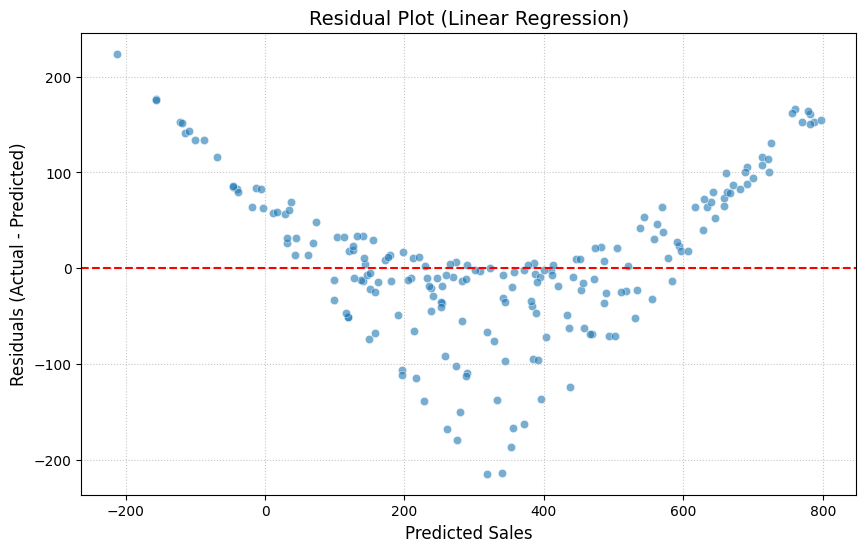

In [172]:
residuals = y_test - linear_predictions

# 2. Create the Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=linear_predictions, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  

plt.title('Residual Plot (Linear Regression)', fontsize=14)
plt.xlabel('Predicted Sales', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [135]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [136]:
rf_predictions = rf_model.predict(X_test)
rf_predictions

array([527.95764 , 580.830075, 409.259445, 139.231575,  44.46519 ,
       583.289595, 127.32888 , 714.48027 , 455.689815, 129.62691 ,
       421.61196 , 475.456485, 215.863095, 252.05859 , 295.04979 ,
       342.207075, 582.21996 , 230.103405, 749.23716 , 184.10784 ,
       426.88716 , 183.61455 , 127.08066 , 125.05731 , 227.61354 ,
       195.81828 , 748.038795,  31.928085, 142.46883 ,  56.82285 ,
        76.09287 , 609.834225,  96.184095, 435.029175, 188.55417 ,
       173.41065 , 663.50214 , 212.14557 , 189.496755, 210.880425,
       218.61021 , 903.73353 ,  68.50347 , 180.45132 ,  91.79289 ,
       399.25368 , 234.247335,  68.516805, 323.9628  , 288.143205,
       432.696075, 101.81724 ,  71.521275, 269.46108 , 182.294595,
       489.522075, 460.545225,  69.02028 , 460.237155, 220.141215,
       127.83078 ,  33.35976 ,  88.08156 , 935.246865, 385.05516 ,
       489.898395, 379.466955, 754.2192  , 930.837075, 120.641325,
       417.94767 , 123.961635, 297.15063 ,  90.182505,  66.862

In [139]:
# Define evaluation metrics
metrics = {
    "Mean Absolute Error": mean_absolute_error,
    "Mean Squared Error": mean_squared_error,
    "R^2 Score": r2_score
}

results = {}
for name, func in metrics.items():
    # Calculate scores for each model
    rf_score = func(y_test, rf_predictions)

    # Store results in the dictionary
    results[name] = {
        "Random Forest": rf_score
    }

In [140]:
results

{'Mean Absolute Error': {'Random Forest': 5.39435189999999},
 'Mean Squared Error': {'Random Forest': 64.76094412968503},
 'R^2 Score': {'Random Forest': 0.9990045814134959}}

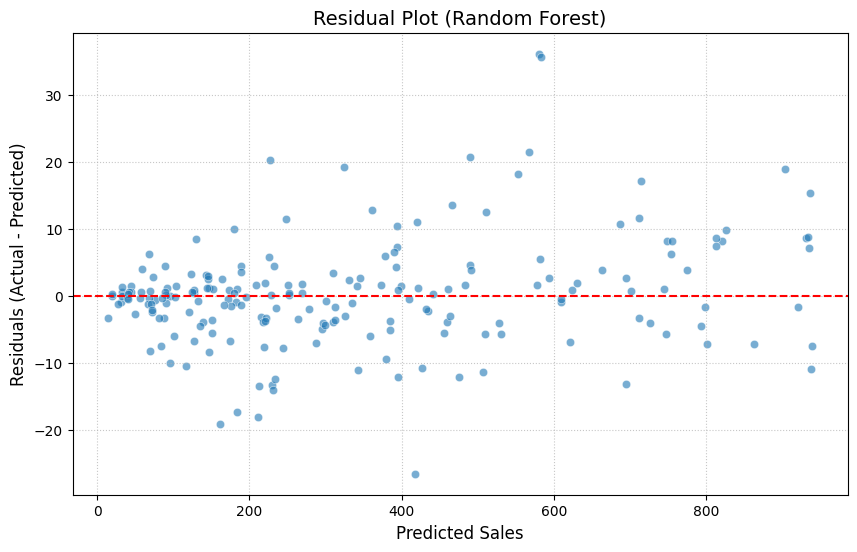

In [141]:
residuals = y_test - rf_predictions

# 2. Create the Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rf_predictions, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  

plt.title('Residual Plot (Random Forest)', fontsize=14)
plt.xlabel('Predicted Sales', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [143]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [144]:
dt_predictions = dt_model.predict(X_test)
dt_predictions

array([521.01  , 586.635 , 419.832 , 140.6475,  43.869 , 586.635 ,
       125.517 , 718.7565, 439.8975, 130.0425, 423.15  , 462.672 ,
       204.6975, 250.7085, 293.643 , 345.0195, 554.148 , 214.137 ,
       745.395 , 180.6   , 415.233 , 177.408 , 125.517 , 125.517 ,
       255.15  , 195.678 , 736.4385,  31.227 , 143.22  ,  56.406 ,
        75.7785, 637.728 ,  96.579 , 446.964 , 223.0725, 173.208 ,
       681.975 , 205.317 , 194.124 , 184.086 , 217.182 , 914.55  ,
        77.175 , 183.036 ,  92.8725, 401.268 , 214.137 ,  63.9975,
       295.6905, 289.926 , 439.215 , 106.596 ,  80.22  , 271.278 ,
       187.32  , 484.5225, 469.77  ,  72.3975, 446.439 , 214.998 ,
       118.902 ,  32.529 ,  88.368 , 944.622 , 375.3645, 514.605 ,
       367.038 , 769.104 , 942.9   , 119.259 , 397.845 , 141.75  ,
       285.705 ,  91.056 ,  63.9975, 695.2365, 772.38  , 253.68  ,
        77.175 , 743.82  , 297.801 ,  69.72  , 312.8895, 620.739 ,
       223.0725, 272.58  ,  71.526 , 829.08  , 367.5525, 394.6

In [145]:
# Define evaluation metrics
metrics = {
    "Mean Absolute Error": mean_absolute_error,
    "Mean Squared Error": mean_squared_error,
    "R^2 Score": r2_score
}

results = {}
for name, func in metrics.items():
    # Calculate scores for each model
    dt_score = func(y_test, dt_predictions)

    # Store results in the dictionary
    results[name] = {
        "Decision Tree": dt_score
    }

In [146]:
results

{'Mean Absolute Error': {'Decision Tree': 6.533887500000003},
 'Mean Squared Error': {'Decision Tree': 105.95761194375005},
 'R^2 Score': {'Decision Tree': 0.9983713613547822}}

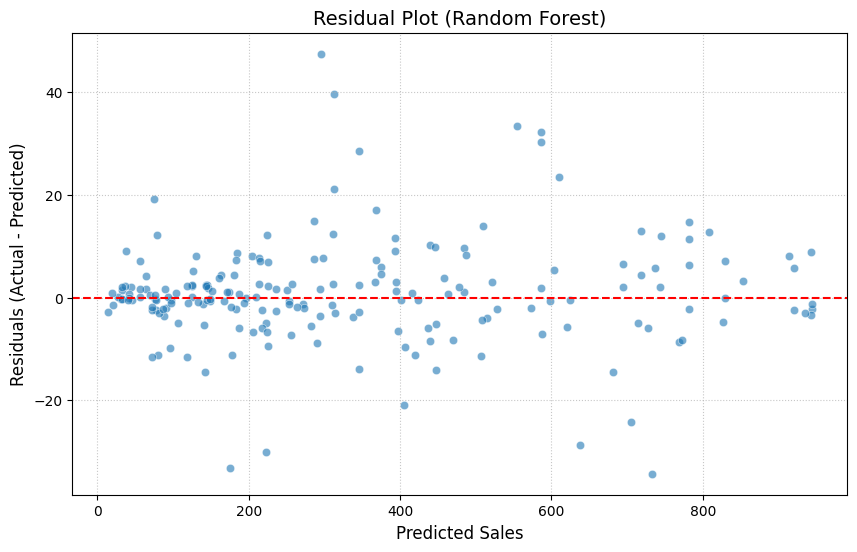

In [147]:
residuals = y_test - dt_predictions

# 2. Create the Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dt_predictions, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  

plt.title('Residual Plot (Random Forest)', fontsize=14)
plt.xlabel('Predicted Sales', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

From the Models I trained above, the best model to be used is the Random Forest Model based on the metrics seen

In [148]:
import joblib
joblib.dump(rf_model, "supermarket.pkl")


['supermarket.pkl']

In [151]:
model = joblib.load("supermarket.pkl")


In [152]:
model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [188]:
# Save the column names your model was trained on
joblib.dump(X.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

In [153]:
pip install streamlit


   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.0 MB 1.4 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/9.0 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.0 MB 1.8 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/9.0 MB 1.9 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/9.0 MB 1.8 MB/s eta 0:00:04
   ----------- ---------------------------- 2.6/9.0 MB 1.7 MB/s eta 0:00:04
   ------------ --------------------------- 2.9/9.0 MB 1.7 MB/s eta 0:00:04
   ------------- -------------------------- 3.1/9.0 MB 1.6 MB/s eta 0:00:04
   ---------------- ----------------------- 3.7/9.0 MB 1.7 MB/s eta 0:00:04
   ----------------- ---------------------- 3.9/9.0 MB 1.6 MB/s eta 0:00:04
   ------------------ -----------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\onyii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
